# Python Project

## Prerequisite instructions

The following instructions is intended for **Windows users**. If you aren't one, please refer to the internet on how to install pytorch and the other libraries for your respective device.

1. Make a folder titled 'pytorch.proj'
2. Open folder and SHIFT + right click inside of it

    a. click on 'Open powershell window here'
    
3. In Powershell, type `python -m venv myvenv`
    
    a. then `.\myvenv\Scripts\activate`
    
    b. `pip install torch`
    
    c. `pip install ipykernel`
    
    d. `pip install torchaudio`
    
    e. `pip install spotipy`
    
    f. `pip install matplotlib`
    
    g. `pip install pandas`
    
4. Finally, type `python -m ipykernel install --user --name torch_kernel`

## Project Overview
    
### Purpose
To use this program as a tool for very basic musical analysis. While this program might seem pretty simple, it's for the user's disposal, in order to get a general idea of a piece of music. In the future, we hope to integrate it with machine learning in order to perform proper automated harmnonic/melodic analysis. 

### Functionalities
- Basic audio analysis
    - Pitch recognition: Use PyTorch to analyze audio input and recognize pitches
    - Graphic representation for ease of reading
- Spotify API: fetch and display audio information about playlists and tracks using spotipy
    - Object Oriented Programming
    - Extracted features include: pitch, timbre, loudness, key, mode, rhythm, tempo, time signature, etc.
    
### Packages
- **PyTorch**
- **Torchaudio**
- **sounddevice** & **soundfile**
- **librosa**
- **spotipy**
- **matplotlib**
- **pandas**
- **ipykernel**

## Feature 1: PyTorch & torchaudio Pitch Recognition

https://pytorch.org/audio/main/tutorials/audio_feature_extractions_tutorial.html#spectrogram

- Waveform is a graphical representation of the amplitude and frequency of a sound wave in a given audio (i.e. the vibration of the sound medium [in our case, air])
- Spectrogram tells you how the strength of a frequency over its waveform (i.e. how loud it is)

Using these these two sets of information, we have better context into the components of pitch

1. install necessary packages (see Prerequisite above) and then import modules

In [10]:
import os
import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
import matplotlib.pyplot as plt
import librosa
import pandas as pd

from IPython.display import Audio
from matplotlib.patches import Rectangle
from torchaudio.utils import download_asset

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# to confirm if torch and torchaudio are properly installed
print(f"Torch version {torch.__version__}")
print(f"Torchaudio version {torchaudio.__version__}")

Torch version 2.1.1+cpu
Torchaudio version 2.1.1+cpu


In [11]:
torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav") # replace with own audio

# defining functions
def visualize_waveform(audio_wave, sample_rate, title="Waveform"):
    plt.figure(figsize=(10, 4))
    plt.plot(torch.linspace(0, len(audio_wave) / sample_rate, len(audio_wave)), audio_wave.t().numpy())
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

def visualize_spectrogram(spectrogram, title="Spectrogram"):
    plt.figure(figsize=(10, 4))
    plt.imshow(librosa.power_to_db(spectrogram.numpy()), cmap='viridis', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel("Frames")
    plt.ylabel("Frequency bin")
    plt.colorbar(format="%+2.0f dB")
    plt.show()
    
def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    # setting axis labels for the primary axis
    axis.set_xlabel("Time (s)")
    axis.set_ylabel("Amplitude")

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")

    # setting axis label for the secondary axis
    axis2.set_ylabel("Pitch (Hz)")

    axis2.legend(loc=0)

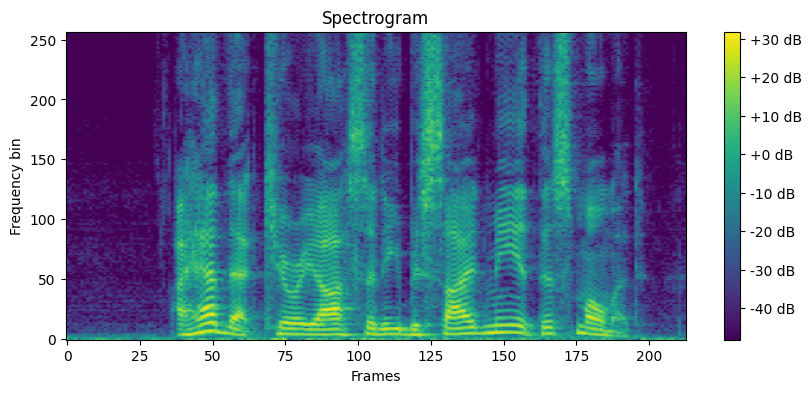

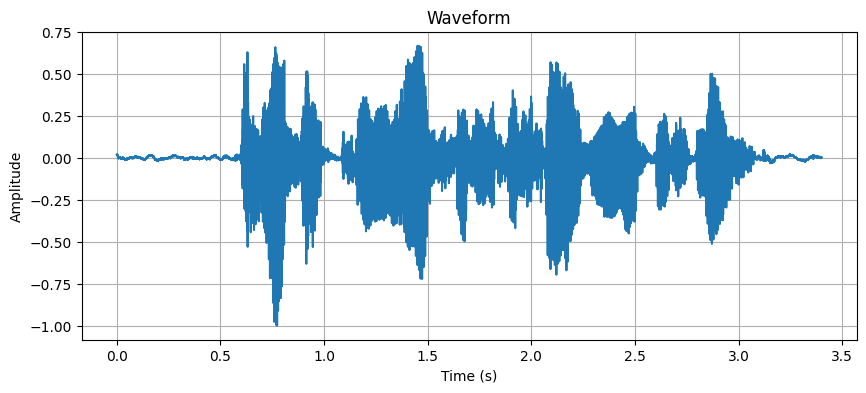

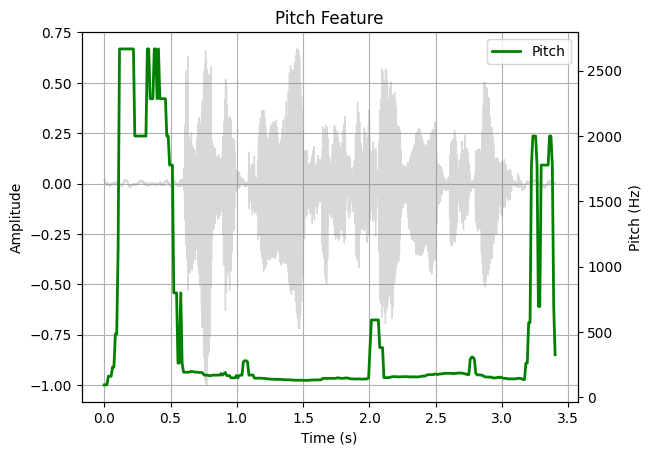

In [12]:
WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

# Spectrogram
spectrogram_transform = T.Spectrogram(n_fft=512)
spectrogram = spectrogram_transform(WAVEFORM)
visualize_spectrogram(spectrogram[0])

# Waveform of audiofile
visualize_waveform(WAVEFORM[0], SAMPLE_RATE)

# Plotted pitch
pitch = F.detect_pitch_frequency(WAVEFORM, SAMPLE_RATE)
plot_pitch(WAVEFORM, SAMPLE_RATE, pitch)

## Feature 2: Spotify API
- https://developer.spotify.com/documentation/web-api/reference/get-audio-analysis
    - will tell you what each of feature means (i.e. danceability, energy, key, loudness, etc.)
    - we should specify what each one means
- https://spotipy.readthedocs.io/en/2.19.0/#
    - Spotify API for Python
    
**MAKE SURE YOU ARE PROPERLY CONNECTED TO THE INTERNET OTHERWISE THIS WILL NOT WORK!!**

In [13]:
# set environment variables
os.environ['SPOTIPY_CLIENT_ID'] = # enter id
os.environ['SPOTIPY_CLIENT_SECRET'] = # enter secret

# authentication using Client Credentials 
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

# to test authentication
track_uri = 'spotify:track:2tLHMA7oSkDl3qz1sRJMVc'
track_data = sp.audio_features(track_uri)[0]
print(track_data)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


{'danceability': 0.403, 'energy': 0.294, 'key': 9, 'loudness': -16.276, 'mode': 1, 'speechiness': 0.0574, 'acousticness': 0.992, 'instrumentalness': 0.88, 'liveness': 0.139, 'valence': 0.0594, 'tempo': 70.627, 'type': 'audio_features', 'id': '2tLHMA7oSkDl3qz1sRJMVc', 'uri': 'spotify:track:2tLHMA7oSkDl3qz1sRJMVc', 'track_href': 'https://api.spotify.com/v1/tracks/2tLHMA7oSkDl3qz1sRJMVc', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2tLHMA7oSkDl3qz1sRJMVc', 'duration_ms': 441642, 'time_signature': 3}


In [14]:
def extract_URI(link):
    return link.split('/')[-1].split('?')[0]

def analyze_album(album_link):
    album_id = extract_URI(album_link)
    album_data = sp.album(album_id)
    album_name = album_data['name']

    track_ids = [track['id'] for track in album_data['tracks']['items']]
    track_names = [track['name'] for track in album_data['tracks']['items']]
    track_artists = [", ".join(artist['name'] for artist in track['artists']) for track in album_data['tracks']['items']]

    features = sp.audio_features(track_ids)
    features_df = pd.DataFrame(data=features)

    features_df['track_number'] = range(1, len(features_df) + 1)
    features_df['name'] = track_names
    features_df['artist'] = track_artists
    features_df['album'] = album_name

    selected_columns = [
        'track_number', 'name', 'artist', 'album', 
        'danceability', 'energy', 'key', 'loudness', 
        'mode', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
    ]
    features_df = features_df[selected_columns]

    return features_df
    
def analyze_track(track_link):
    track_id = extract_URI(track_link)
    track_data = sp.track(track_id)
    features = sp.audio_features(track_id)[0]

    track_details = {
        'name': track_data['name'],
        'artist': ", ".join(artist['name'] for artist in track_data['artists']),
        'album': track_data['album']['name'],
        'danceability': features['danceability'],
        'energy': features['energy'],
        'key': features['key'],
        'loudness': features['loudness'],
        'mode': features['mode'],
        'acousticness': features['acousticness'],
        'instrumentalness': features['instrumentalness'],
        'liveness': features['liveness'],
        'valence': features['valence'],
        'tempo': features['tempo'],
        'duration_ms': features['duration_ms'],
        'time_signature': features['time_signature']
    }

    track_df = pd.DataFrame([track_details])
    
    return track_df

def analyze_playlist(playlist_link):
    playlist_id = extract_URI(playlist_link)
    results = sp.playlist_tracks(playlist_id)

    # lists to store track data
    track_ids = []
    track_names = []
    track_artists = []
    track_albums = []

    for item in results['items']:
        track = item['track']
        track_ids.append(track['id'])
        track_names.append(track['name'])
        track_artists.append(", ".join(artist['name'] for artist in track['artists']))
        track_albums.append(track['album']['name'])

    # audio features for each track
    features = sp.audio_features(track_ids)
    features_df = pd.DataFrame(data=features)

    # add track information to the DataFrame
    features_df['track_number'] = range(1, len(features_df) + 1)
    features_df['name'] = track_names
    features_df['artist'] = track_artists
    features_df['album'] = track_albums

    # select and reorder DF columns
    selected_columns = [
        'track_number', 'name', 'artist', 'album', 
        'danceability', 'energy', 'key', 'loudness', 
        'mode', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
    ]
    features_df = features_df[selected_columns]

    return features_df

In [15]:
choice = input('Album (a), Track (b), or Playlist (c): ').lower()

if choice == 'a':
    print('Enter link of album: ')
    link = input()
    album_df = analyze_album(link)
    print(album_df)

elif choice == 'b':
    print('Enter link of track: ')
    link = input()
    track_df = analyze_track(link)
    print(track_df)

elif choice == 'c':
    print('Enter link of playlist: ')
    link = input()
    playlist_df = analyze_playlist(link)
    print(playlist_df)

else:
    print(f"{choice} is invalid. Run code again.")

Album (a), Track (b), or Playlist (c): b
Enter link of track: 
https://open.spotify.com/track/1IHWl5LamUGEuP4ozKQSXZ?si=013173b6ac5a456a


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


               name     artist             album  danceability  energy  key  \
0  Tití Me Preguntó  Bad Bunny  Un Verano Sin Ti          0.65   0.715    5   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.198     0        0.0993          0.000291     0.126    0.187  106.672   

   duration_ms  time_signature  
0       243717               4  


## Main function

In [9]:
def main():
    print(f"(Torch version {torch.__version__})")
    print(f"(Torchaudio version {torchaudio.__version__})")

    torch.random.manual_seed(0)
    
    print("""
******************************************
                                 
 _____       _ _     _____     
|  _  |_ _ _| |_|___|  _  |_ _ 
|     | | | . | | . |   __| | |
|__|__|___|___|_|___|__|  |_  |
                          |___|
          
          
******************************************

+========= AUDIOPY MENU =========+
|                                |
|  1. Analyze User Audio         |
|  2. Analyze Spotify Music      |
|  (else). Exit                  |
|                                |
+================================+
    """)

    # user choice for the type of analysis
    analysis_choice = int(input("Enter choice:  "))

    if analysis_choice == 1:
        filename = input('Enter the name of the file: ')
        if os.path.exists(filename):
            WAVEFORM, SAMPLE_RATE = torchaudio.load(filename)

            # spectrogram and pitch analysis
            spectrogram = T.Spectrogram(n_fft=512)
            spec = spectrogram(WAVEFORM)
            pitch = F.detect_pitch_frequency(WAVEFORM, SAMPLE_RATE)

            # visualizations
            visualize_waveform(WAVEFORM[0], SAMPLE_RATE, title="Original waveform")
            visualize_spectrogram(spec[0], title="Spectrogram")
            plot_pitch(WAVEFORM, SAMPLE_RATE, pitch)
        else:
            print(f"{filename} not found. Run code again.")

    elif analysis_choice == 2:
        # set environment variables for spotify
        os.environ['SPOTIPY_CLIENT_ID'] = #ENTER ID
        os.environ['SPOTIPY_CLIENT_SECRET'] = #ENTER SECRET

        # client credentials authentication
        auth_manager = SpotifyClientCredentials()
        sp = spotipy.Spotify(auth_manager=auth_manager)

        # spotify analysis
        choice = input('Album (a), Track (b), or Playlist (c): ').lower()

        if choice == 'a':
            print('Enter link of album: ')
            link = input()
            album_df = analyze_album(link)
            print(album_df)

        elif choice == 'b':
            print('Enter link of track: ')
            link = input()
            track_df = analyze_track(link)
            print(track_df)

        elif choice == 'c':
            print('Enter link of playlist: ')
            link = input()
            playlist_df = analyze_playlist(link)
            print(playlist_df)

        else:
            print(f"{choice} is invalid. Run code again.")

    else:
        print("Exiting")

if __name__ == "__main__":
    main()

(Torch version 2.1.1+cpu)
(Torchaudio version 2.1.1+cpu)

******************************************
                                 
 _____       _ _     _____     
|  _  |_ _ _| |_|___|  _  |_ _ 
|     | | | . | | . |   __| | |
|__|__|___|___|_|___|__|  |_  |
                          |___|
          
          
******************************************

+========= AUDIOPY MENU =========+
|                                |
|  1. Analyze User Audio         |
|  2. Analyze Spotify Music      |
|  (else). Exit                  |
|                                |
+================================+
    
Enter choice:  2
Album (a), Track (b), or Playlist (c): b
Enter link of track: 
https://open.spotify.com/track/1IHWl5LamUGEuP4ozKQSXZ?si=013173b6ac5a456a


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


               name     artist             album  danceability  energy  key  \
0  Tití Me Preguntó  Bad Bunny  Un Verano Sin Ti          0.65   0.715    5   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.198     0        0.0993          0.000291     0.126    0.187  106.672   

   duration_ms  time_signature  
0       243717               4  
